## Data Exploration



In [1]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# fetch dataset 
poker_hand = fetch_ucirepo(id=158) 
  
# data (as pandas dataframes) 
X = poker_hand.data.features 
y = poker_hand.data.targets 
  
# metadata 
print(poker_hand.metadata) 
  
# variable information 
print(poker_hand.variables) 


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

In [3]:
df = pd.concat([X, y], axis=1)

print(df)

         S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0         1  10   1  11   1  13   1  12   1   1      9
1         2  11   2  13   2  10   2  12   2   1      9
2         3  12   3  11   3  13   3  10   3   1      9
3         4  10   4  11   4   1   4  13   4  12      9
4         4   1   4  13   4  12   4  11   4  10      9
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
1025005   3   1   1  12   2   9   4   9   2   6      1
1025006   3   3   4   5   2   7   1   4   4   3      1
1025007   1  11   4   7   3   9   1  13   2   7      1
1025008   3  11   1   8   1   1   3  13   2   8      1
1025009   2   5   2   9   4   9   2   3   3   3      2

[1025010 rows x 11 columns]


**TASK: Create a correlation heatmap.**

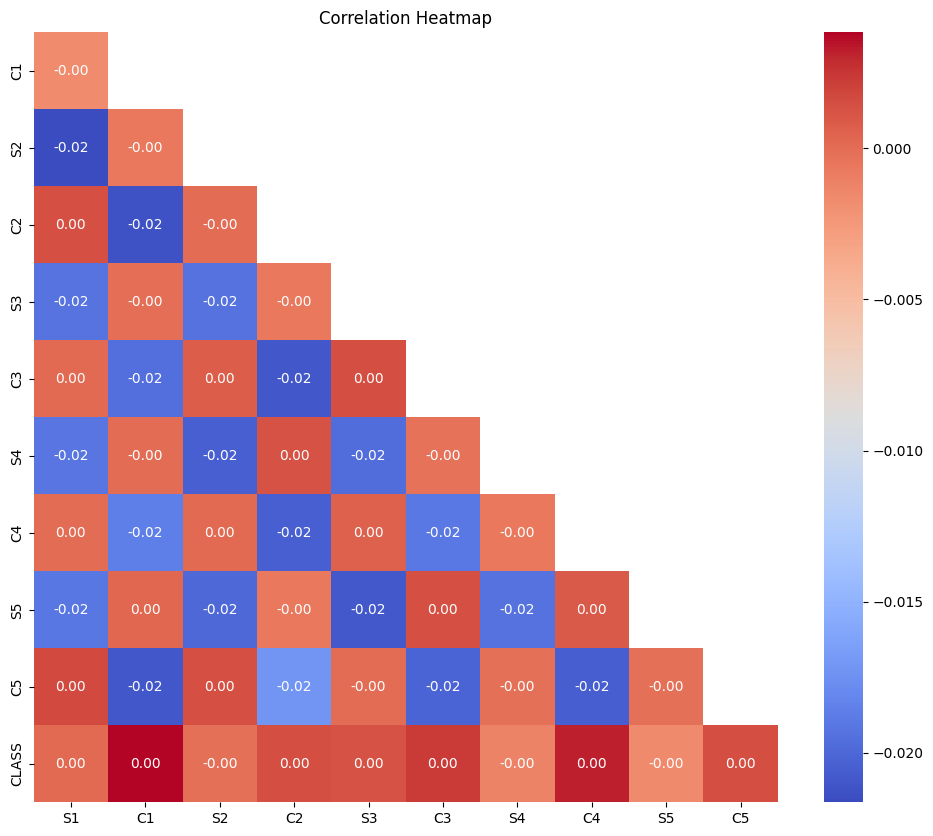

In [4]:
correlation_heatmap = df.corr()

plt.figure(figsize=(12, 10))

mask = np.zeros_like(correlation_heatmap, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_heatmap.mask(mask).dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()


**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [5]:
correlation_with_target = df.corrwith(X.iloc[:, -1]).abs()

sorted_correlation = correlation_with_target.sort_values(ascending=False)

top_correlated_features = sorted_correlation.head(5)

print("The top 5 correlated frequencies with the target/label:\n");
print(top_correlated_features)

The top 5 correlated frequencies with the target/label:

C5    1.000000
C1    0.020946
C4    0.020631
C3    0.020151
C2    0.017253
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (922509, 10)
y_train: (922509, 1)
X_test: (102501, 10)
y_test: (102501, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('knn', KNeighborsRegressor())  # KNeighborsRegressor as the model
])

# Now you can use this pipeline for fitting and prediction
pipeline.fit(X_train, y_train)

# You can also do predictions
predictions = pipeline.predict(X_test)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [ ]:
param_grid = {'knn__n_neighbors': list(range(1,20))}
pipeline.set_params(knn=KNeighborsRegressor())

full_cv_regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
full_cv_regressor.fit(X_train, y_train)

In [ ]:
print("The best parameters are:")

param_dict = full_cv_regressor.best_estimator_.get_params()
full_cv_regressor.best_estimator_.get_params()

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [ ]:
cv_results = full_cv_regressor.cv_results_
mean_test_scores = cv_results['mean_test_score']
k_values = [param['knn__n_neighbors'] for param in cv_results['params']]

plt.figure(figsize=(12, 6))
plt.plot(k_values, -mean_test_scores, marker='o') 

plt.title('Mean Test Scores per K Value for KNN Regressor')

plt.xlabel('Number of Neighbors: K')
plt.ylabel('Mean Test Score (MSE)')

plt.xticks(k_values)

plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [ ]:
best_estimator = full_cv_regressor.best_estimator_

y_pred = best_estimator.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix Array:")
print(confusion_matrix(y_test, y_pred))